# 확률적 데이터와 확률변수

생년월일처럼 언제 누가 얻더라도 항상 같은 값이 나오는 데이터를 **결정론적 데이터(deterministic data)**라고 하고 혈압처럼 정확히 예측할 수 없는 값이 나오는 데이터를 **확률적 데이터(random data, probabilistic data, stochastic data)**라고 한다. 우리가 다루는 대부분의 데이터는 확률적 데이터다.

그런데 대부분의 확률적 데이터값을 살펴보면 어떤 값은 자주 등장하고 어떤 값은 드물게 나오거나 나오지 않는 경우가 많다. 확률적 데이터에서 어떠한 값이 자주 나오고 어떠한 값이 드물게 나오는가를 나타내는 정보를 **분포(distribution)**라고 한다.

In [1]:
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
np.random.seed(0)
x = np.random.normal(size=21)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982])

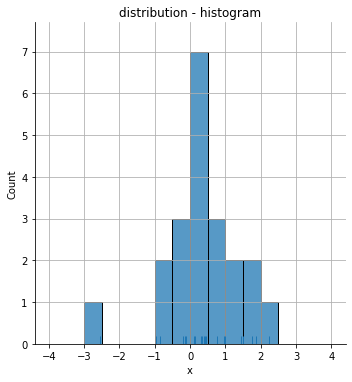

In [10]:
bins = np.linspace(-4, 4, 17)
sns.displot(x, rug=True, kde=False, bins=bins)
plt.title("distribution - histogram")
plt.grid()
plt.xlabel("x")
plt.show()

In [11]:
print("mean = {}, median = {}".format(np.mean(x), np.median(x)))

mean = 0.4206524782418389, median = 0.4001572083672233


In [12]:
ns, _ = np.histogram(x, bins=bins)
m_bin = np.argmax(ns)
print("argmax = {}~{}".format(bins[m_bin], bins[m_bin + 1]))

argmax = 0.0~0.5


In [13]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

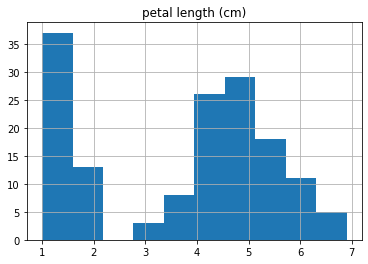

In [27]:
df['petal length (cm)'].hist()
plt.title('petal length (cm)')
plt.show()

<AxesSubplot:>

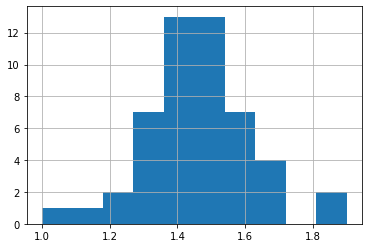

In [33]:
df[df.species == 'setosa']['petal length (cm)'].hist()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


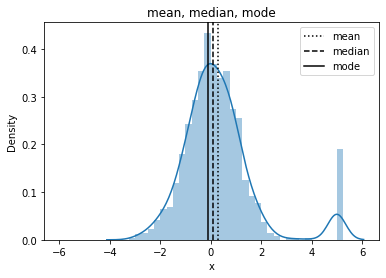

In [39]:
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])
bins = np.linspace(-6, 6, 12 * 4 + 1)
ns, _ = np.histogram(x, bins=bins)

sample_mean = np.mean(x)
sample_median = np.median(x)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

sns.distplot(x, bins=bins)
plt.axvline(sample_mean, c='k', ls=":", label="mean")
plt.axvline(sample_median, c='k', ls="--", label="median")
plt.axvline(sample_mode, c='k', ls="-", label="mode")
plt.title("mean, median, mode")
plt.xlabel("x")
plt.legend()
plt.show()

In [42]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [63]:
v = df[df.species =='virginica']['petal length (cm)']

def samp_stats(v, n, v_min=0, v_max=10):
    bins = np.linspace(v_min, v_max, n+1)
    ns, _ = np.histogram(v, bins = bins)
    
    sample_mean = np.mean(v)
    sample_median = np.median(v)
    mode_index = np.argmax(ns)
    sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])
    
    sns.distplot(v, bins = bins)
    plt.axvline(sample_mean, c='k', ls=":", label="mean")
    plt.axvline(sample_median, c='k', ls="--", label="median")
    plt.axvline(sample_mode, c='k', ls="-", label="mode")
    plt.title("mean, median, mode")
    plt.xlabel("v")
    plt.legend()
    plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


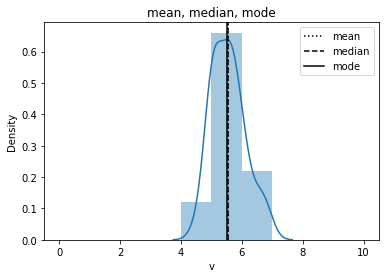

In [65]:
samp_stats(v, 10)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


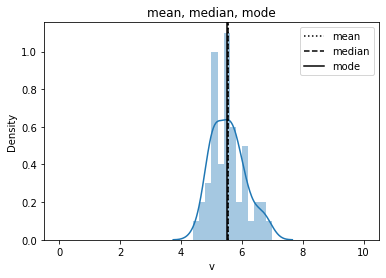

In [66]:
samp_stats(v, 50)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


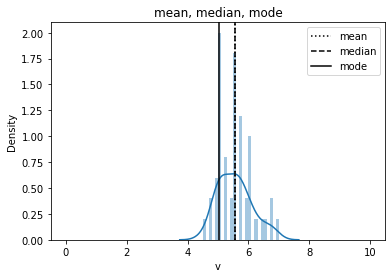

In [67]:
samp_stats(v, 100)

In [69]:
import scipy as sp

In [70]:
sp.random.seed(0)
x = sp.stats.norm(0, 2).rvs(1000)  # 평균=0, 표준편차=2 인 정규분포 데이터 생성

In [71]:
np.var(x), np.std(x) # 편향 표본분산, 표본표준편차

(3.896937825248617, 1.9740663173380515)

In [72]:
np.var(x, ddof=1), np.std(x, ddof=1)  # 비편향 표본분산, 표본표준편차

(3.900838663912529, 1.9750540913890255)

In [73]:
import pandas_datareader.data as web

df = web.DataReader("DJCA", data_source='fred').dropna()["DJCA"]
r = np.log(df / df.shift(1)).dropna().values

In [79]:
np.mean(r), np.var(r), np.std(r)

(0.0003731123121574251, 0.00016032249851811865, 0.012661852096676798)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


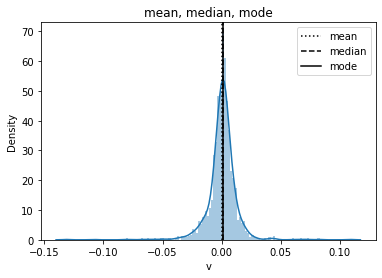

In [80]:
samp_stats(r, 100, -0.09, 0.09)

In [82]:
volability = np.std(r) * np.sqrt(256) * 100
print("{}.%".format(volability))

20.258963354682876.%


In [83]:
sp.stats.skew(x), sp.stats.kurtosis(x)  

(0.03385895323565712, -0.0467663244783294)

분산, 비대칭도, 첨도를 구하기 위해 제곱, 세제곱, 네제곱을 하는 것처럼 k제곱을 이용하여 구한 모멘트를 k차 **표본모멘트(sample moment)**라고 한다.

따라서 평균은 1차 모멘트, 분산은 2차 모멘트, 비대칭도와 첨도는 3차 모멘트와 4차 모멘트에서 유도된 값이다.

In [85]:
sp.stats.moment(x, 1), sp.stats.moment(x, 2), sp.stats.moment(x, 3), sp.stats.moment(x, 4)

(0.0, 3.896937825248617, 0.2604706193725514, 44.84817401965371)

In [88]:
np.var(x)

3.896937825248617

In [89]:
np.mean(x)

-0.09051341498039077